In [5]:
import zipfile
import os
import pandas as pd
from google.colab import files


zip_path = "/content/dataset_arogo.zip"

if not os.path.exists(zip_path):
    print("Upload your ZIP file:")
    uploaded = files.upload()
    zip_path = list(uploaded.keys())[0]


extract_folder = "/content/extracted_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Extracted files:", os.listdir(extract_folder))


csv_files = [f for f in os.listdir(extract_folder) if f.endswith('.csv')]

if csv_files:
    csv_path = os.path.join(extract_folder, csv_files[0])
    df = pd.read_csv(csv_path)
    print("Preview of the dataset:\n", df.tail())
else:
    print("No CSV files found in the extracted folder.")


Upload your ZIP file:


Saving dataset_arogo.zip to dataset_arogo.zip
Extracted files: ['depression_anxiety_data.csv']
Preview of the dataset:
       id  school_year  age  gender        bmi     who_bmi  phq_score  \
778  779            4   24  female  21.096191      Normal          6   
779  780            4   22    male  25.308642  Overweight          4   
780  781            4   22    male  22.720438      Normal          2   
781  782            4   22  female  23.033168      Normal         17   
782  783            4   22    male  22.598140      Normal          6   

    depression_severity depressiveness suicidal depression_diagnosis  \
778                Mild          False    False                False   
779        None-minimal          False    False                False   
780        None-minimal          False    False                False   
781   Moderately severe           True    False                False   
782                Mild          False    False                False   

    depression

In [ ]:
df["depression_severity"].value_counts()

,count
depression_severity,
Mild,344
None-minimal,226
Moderate,140
Moderately severe,42
none,15
Severe,12


In [ ]:
df.tail()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
778,779,4,24,female,21.096191,Normal,6,Mild,False,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,male,25.308642,Overweight,4,None-minimal,False,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,male,22.720438,Normal,2,None-minimal,False,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,female,23.033168,Normal,17,Moderately severe,True,False,False,False,19,Severe,True,False,False,15.0,True
782,783,4,22,male,22.598140,Normal,6,Mild,False,False,False,False,6,Mild,False,False,False,0.0,False


In [ ]:

df.isnull().sum()


,0
id,0
school_year,0
age,0
gender,0
bmi,0
who_bmi,0
phq_score,0
depression_severity,4
depressiveness,3
suicidal,1


In [6]:
df.fillna(method="ffill", inplace=True)


<ipython-input-6-055e2706e0b4>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill
<ipython-input-6-055e2706e0b4>:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(method="ffill", inplace=True)  # Forward fill


In [ ]:

df.isnull().sum()

,0
id,0
school_year,0
age,0
gender,0
bmi,0
who_bmi,0
phq_score,0
depression_severity,0
depressiveness,0
suicidal,0


In [7]:
from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df["gender"] = encoder.fit_transform(df["gender"])
df["who_bmi"] = encoder.fit_transform(df["who_bmi"])


In [8]:
df['depressiveness'] = df['depressiveness'].astype(int)
df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,1,33.333333,0,9,Mild,0,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,1,19.841270,3,8,Mild,0,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,1,25.102391,5,8,Mild,0,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,0,23.738662,3,19,Moderately severe,1,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,1,25.617284,5,6,Mild,0,False,False,False,14,Moderate,True,False,False,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,0,21.096191,3,6,Mild,0,False,False,False,1,None-minimal,False,False,False,3.0,False
779,780,4,22,1,25.308642,5,4,None-minimal,0,False,False,False,6,Mild,False,False,False,3.0,False
780,781,4,22,1,22.720438,3,2,None-minimal,0,False,False,False,5,Mild,False,False,False,4.0,False
781,782,4,22,0,23.033168,3,17,Moderately severe,1,False,False,False,19,Severe,True,False,False,15.0,True


In [9]:
df['suicidal'] = df['suicidal'].astype(int)
df['depression_diagnosis'] = df['depression_diagnosis'].astype(int)
df['depression_treatment'] = df['depression_treatment'].astype(int)
df['anxiousness'] = df['anxiousness'].astype(int)
df['anxiety_diagnosis'] = df['anxiety_diagnosis'].astype(int)
df['anxiety_treatment'] = df['anxiety_treatment'].astype(int)
df['sleepiness'] = df['sleepiness'].astype(int)
df

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,1,33.333333,0,9,Mild,0,0,0,0,11,Moderate,1,0,0,7.0,0
1,2,1,18,1,19.841270,3,8,Mild,0,0,0,0,5,Mild,0,0,0,14.0,1
2,3,1,19,1,25.102391,5,8,Mild,0,0,0,0,6,Mild,0,0,0,6.0,0
3,4,1,18,0,23.738662,3,19,Moderately severe,1,1,0,0,15,Severe,1,0,0,11.0,1
4,5,1,18,1,25.617284,5,6,Mild,0,0,0,0,14,Moderate,1,0,0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,779,4,24,0,21.096191,3,6,Mild,0,0,0,0,1,None-minimal,0,0,0,3.0,0
779,780,4,22,1,25.308642,5,4,None-minimal,0,0,0,0,6,Mild,0,0,0,3.0,0
780,781,4,22,1,22.720438,3,2,None-minimal,0,0,0,0,5,Mild,0,0,0,4.0,0
781,782,4,22,0,23.033168,3,17,Moderately severe,1,0,0,0,19,Severe,1,0,0,15.0,1


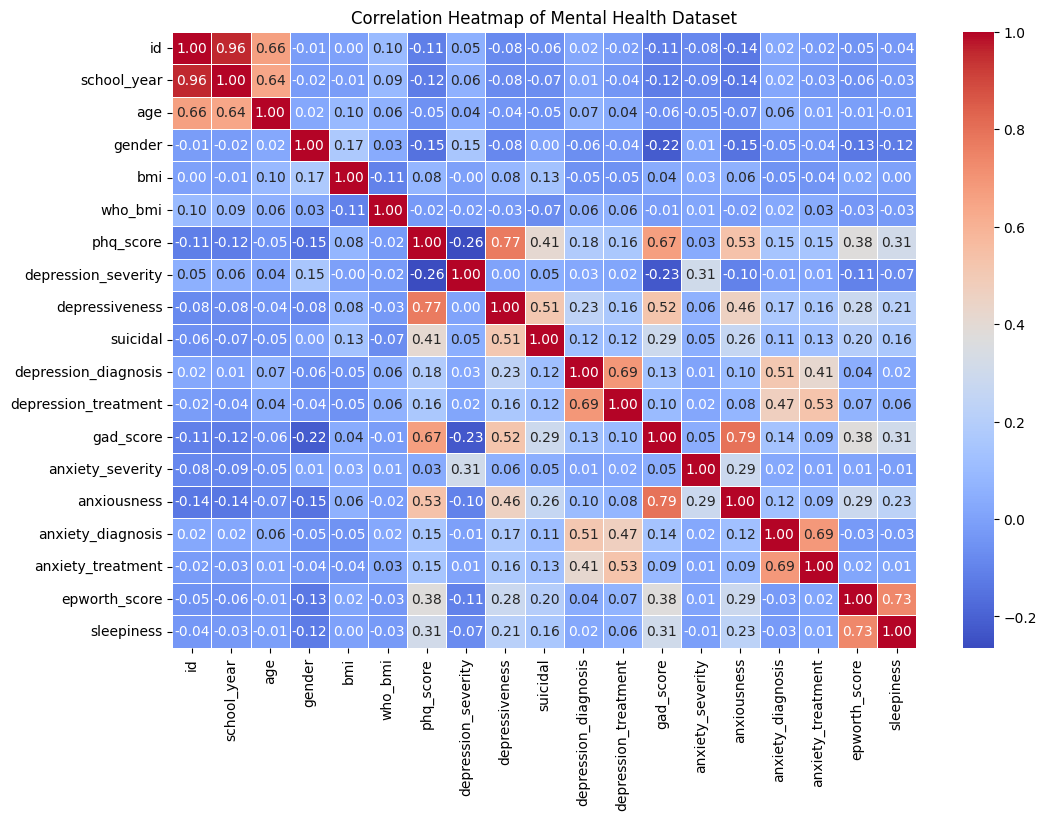

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

categorical_cols = ["gender", "who_bmi", "depression_severity", "anxiety_severity", "sleepiness"]
encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])


plt.figure(figsize=(12, 8))
corr = df.corr()


sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Mental Health Dataset")
plt.show()


In [11]:
selected_features = ["gad_score", "phq_score","epworth_score"]
target_variable = "depression_severity"

X = df[selected_features]
y = df[target_variable]


In [ ]:
y.value_counts()

,count
depression_severity,
0,345
3,229
1,140
2,42
5,15
4,12


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48, stratify=y)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score


log_reg = LogisticRegression(multi_class="ovr", solver="liblinear")
log_reg.fit(X_train, y_train)


y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("Accuracy:", accuracy_score(y_test, y_pred_log))

y_pred_proba = log_reg.predict_proba(X_test)


roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print("ROC-AUC:", roc_auc)

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        69
           1       0.27      0.14      0.19        28
           2       0.00      0.00      0.00         9
           3       0.94      1.00      0.97        46
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         3

    accuracy                           0.76       157
   macro avg       0.32      0.36      0.33       157
weighted avg       0.65      0.76      0.69       157

Accuracy: 0.7579617834394905
ROC-AUC: 0.973847638739677


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.

In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
from sklearn.metrics import roc_auc_score


y_pred_proba = rf.predict_proba(X_test)


roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print("ROC-AUC:", roc_auc)

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        69
           1       0.97      1.00      0.98        28
           2       0.80      0.89      0.84         9
           3       0.98      1.00      0.99        46
           4       0.00      0.00      0.00         2
           5       1.00      0.67      0.80         3

    accuracy                           0.97       157
   macro avg       0.79      0.76      0.77       157
weighted avg       0.96      0.97      0.97       157

Accuracy: 0.9745222929936306
ROC-AUC: 0.9949720055496499


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [19]:
import numpy as np
symptoms = np.array([19, 10,10]).reshape(1,-1)
prediction = rf.predict(symptoms)
print(prediction)

[1]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
X_test

,gad_score,phq_score,epworth_score
529,0,3,5.0
277,8,3,6.0
55,11,12,8.0
65,12,10,6.0
480,11,12,5.0
...,...,...,...
764,12,9,12.0
221,6,5,6.0
611,13,13,10.0
98,5,12,12.0


In [23]:
import joblib

joblib.dump(rf, 'trained_model.pkl')

['trained_model.pkl']